# EDA for Figure1-COVID-chestxray-dataset

여기서 진행한 EDA (Exploratory Data Analysis)는 COVIDx-CXR dataset을 생성하는 [create_COVIDx.ipynb](https://github.com/lindawangg/COVID-Net/blob/master/create_COVIDx.ipynb)의 내용을 기반으로 작성되었다. COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image만 사용했다.

In [2]:
import pandas as pd

## Load metadata.csv

metadata.csv 파일의 인코딩이 unknown 8-bit라서 이를 utf-8로 변경해줘야 한다 (참고: [Link](https://stackoverflow.com/a/58833909)).

In [133]:
meta_data_path = 'Figure1-COVID-chestxray-dataset/metadata.csv'
meta_data = pd.read_csv(meta_data_path)
meta_data.head(3)

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...
1,COVID-00002,NaN,M,50+,NaN,NaN,NaN,NaN,AP erect,X-ray,NaN,"50+ male patient, asthmatic, returning from a ..."
2,COVID-00003a,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,"28M previously fit and well, not on any regula..."


## Attirubtes

| Attribute | Description |
|:------|:-----|
| patientid | Internal identifier |
| offset | Number of days since the start of symptoms or hospitalization for each image. If a report indicates "after a few days", then 5 days is assumed. This is very important to have when there are multiple images for the same patient to track progression. |
| sex | Male (M), Female (F), or blank |
| age | Age of the patient in years |
| finding | Type of pneumonia |
| survival | Yes (Y) or no (N) or blank if unknown|
| temperature | Temperature of the patient in Celsius at the time of the image|
| pO2 saturation | partial pressure of oxygen saturation in % at the time of the image |
| view | Posteroanterior (PA), Anteroposterior (AP), AP Supine (APS), or Lateral (L) for X-rays; Axial or Coronal for CT scans. Translations: Bettaufnahme->Supine, Liegend->Supine|
| modality | CT, X-ray, or something else |
| artifacts/distortion | a change to the intended or true meaning of something:|
| notes | Clinical notes about the image and/or the patient or other notes|

In [5]:
meta_data.dtypes

patientid                object
offset                  float64
sex                      object
age                      object
finding                  object
survival                float64
temperature              object
pO2 saturation           object
view                     object
modality                 object
artifacts/distortion     object
notes                    object
dtype: object

## Data distribution

### # images

In [132]:
print(f'All: {len(meta_data)}, COVID-19: {meta_data["finding"].value_counts()["COVID-19"]}')

All: 55, COVID-19: 35


### # images by patient ID

모든 Patient가 1장의 CXR image를 가진다.

In [12]:
meta_data['patientid'].value_counts().max()

1

### Patient types

Patient의 질환에 대해 살펴보았다.

#### All types

Figure1-COVID-chestxray-dataset는 Image는 3개의 Class를 가진다.

In [13]:
meta_data['finding'].unique()

array(['COVID-19', nan, 'No finding', 'Pneumonia'], dtype=object)

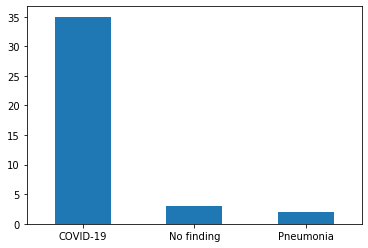

In [19]:
meta_data['finding'].value_counts().plot.bar(rot=0)

### Other columns

In [82]:
meta_data.columns.tolist()

['patientid',
 'offset',
 'sex',
 'age',
 'finding',
 'survival',
 'temperature',
 'pO2 saturation',
 'view',
 'modality',
 'artifacts/distortion',
 'notes']

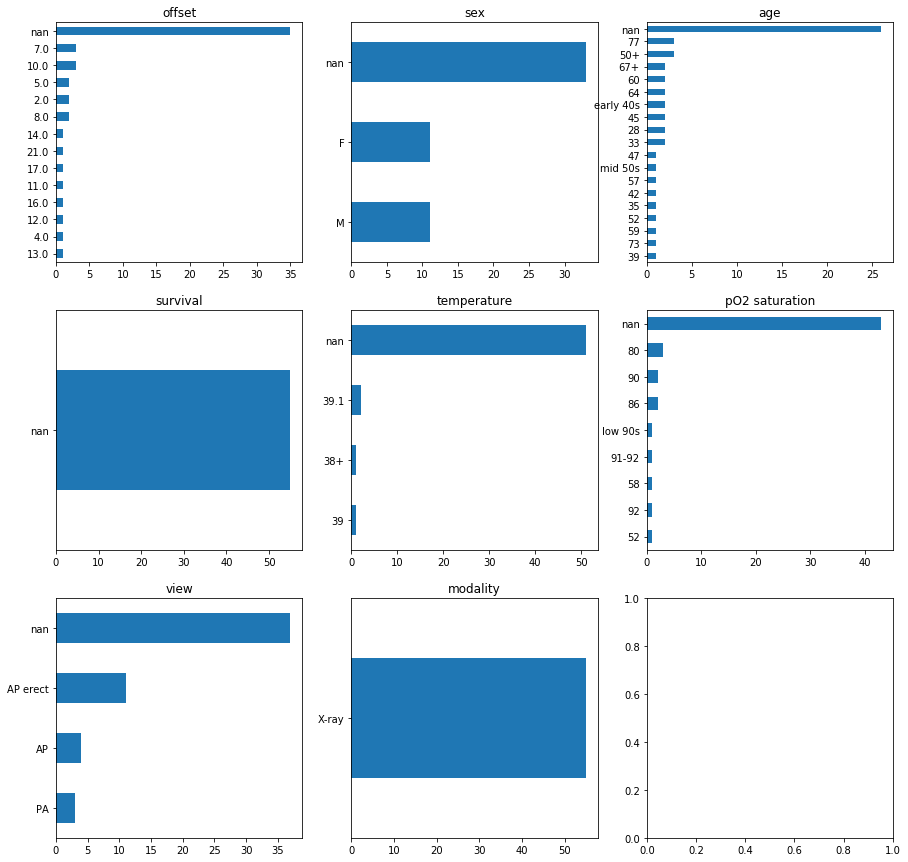

In [118]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
meta_data['offset'].value_counts(dropna=False, ascending=True).plot.barh(title='offset', ax=axes[0,0])
meta_data['sex'].value_counts(dropna=False, ascending=True).plot.barh(title='sex', ax=axes[0,1])
meta_data['age'].value_counts(dropna=False, ascending=True).plot.barh(title='age', ax=axes[0,2])
meta_data['survival'].value_counts(dropna=False, ascending=True).plot.barh(title='survival', ax=axes[1,0])
meta_data['temperature'].value_counts(dropna=False, ascending=True).plot.barh(title='temperature', ax=axes[1,1])
meta_data['pO2 saturation'].value_counts(dropna=False, ascending=True).plot.barh(title='pO2 saturation', ax=axes[1,2])
meta_data['view'].value_counts(dropna=False, ascending=True).plot.barh(title='view', ax=axes[2,0])
meta_data['modality'].value_counts(dropna=False, ascending=True).plot.barh(title='modality', ax=axes[2,1])


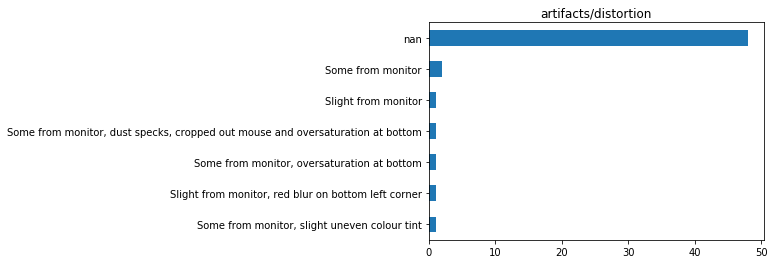

In [98]:
meta_data['artifacts/distortion'].value_counts(dropna=False, ascending=True).plot.barh(title='artifacts/distortion')

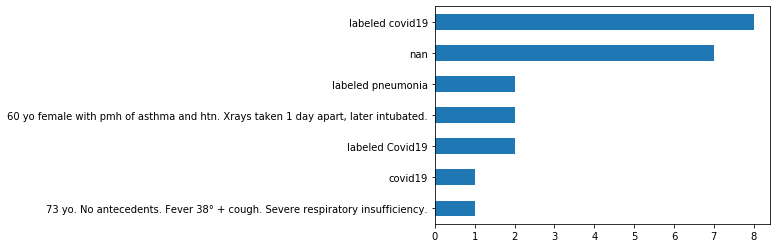

In [112]:
meta_data['notes'].value_counts(dropna=False, ascending=True)[-7:].plot.barh()

## Test dataset

COVIDx-CXR dataset에서 covid-chestxray-dataset에 대해 선택한 Test dataset의 Patient ID들을 살펴보았다.

In [122]:
test_patients = ['COVID-00024', 'COVID-00025', 'COVID-00026', 'COVID-00027', 'COVID-00029',
                 'COVID-00030', 'COVID-00032', 'COVID-00033', 'COVID-00035', 'COVID-00036',
                 'COVID-00037', 'COVID-00038',]

In [123]:
len(test_patients)

12

In [21]:
meta_data[meta_data['patientid'].isin(test_patients)]

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes
26,COVID-00024,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled Covid19
27,COVID-00025,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled Covid19
28,COVID-00026,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,covid19
29,COVID-00027,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
31,COVID-00029,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
32,COVID-00030,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
34,COVID-00032,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
35,COVID-00033,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
37,COVID-00035,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19
38,COVID-00036,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,NaN,X-ray,NaN,labeled covid19


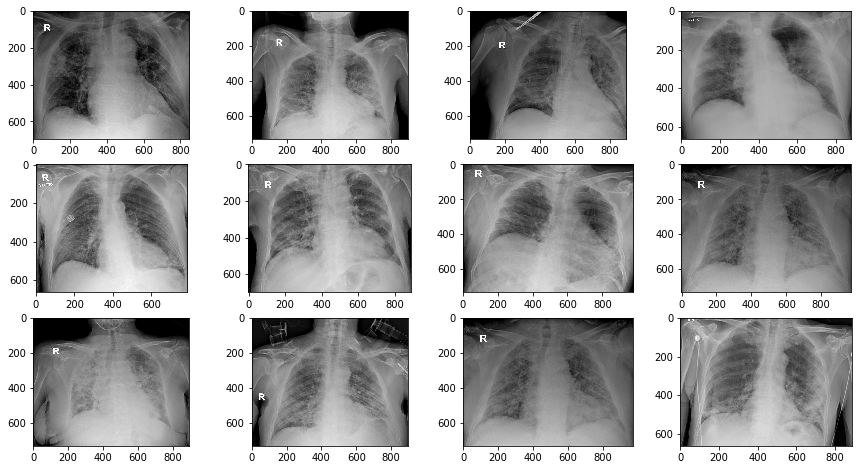

In [120]:
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(15, 8))
for i, patient in enumerate(test_patients):
    img = cv2.imread(f'Figure1-COVID-chestxray-dataset/images/{patient}.jpg')
    fig.add_subplot(3, 4, i+1)
    plt.imshow(img)
    
plt.show()

## Conclusion

* COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image들만 사용했다.
* 전체 35장의 COVID-19 image 중 12장만 Test dataset으로 사용했다.